# Upload the Dataset

In [157]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
from utils.DataSet import Data

year = 1995
df = Data(year=year)
df.upload_country_df()

# Get entropies

In [159]:
entropy_country, entropy_product = df.get_entropy()

# Get GDP PPP

In [160]:
gdp_country = df.get_gdp()

# Get product exportes

In [161]:
product_exporters = df.get_product_count()

# Plot

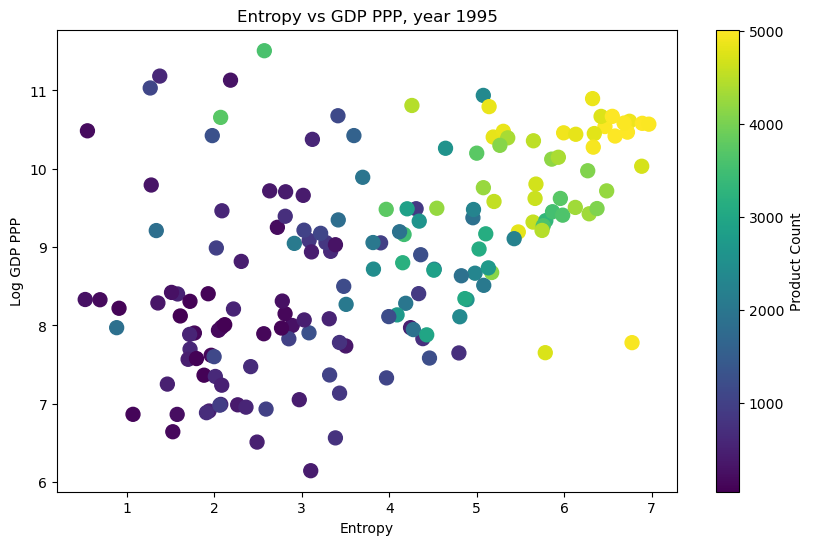

In [164]:
import matplotlib.pyplot as plt

# Create a scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(plot_df['entropy'], plot_df['log gdpPPP'], c=plot_df['product count'], s=100, cmap='viridis')

# Set plot labels and title
plt.title(f"Entropy vs GDP PPP, year {year}")
plt.xlabel("Entropy")
plt.ylabel("Log GDP PPP")

# Create a colorbar
cbar = plt.colorbar()
cbar.set_label("Product Count")

# Show the plot
plt.show()

# Plotly Plot

In [165]:
import plotly.express as px
import pandas as pd


# Create a Pandas DataFrame with the columns for the scatter plot, from dictionaries
plot_df = pd.DataFrame(index=entropy_country.keys())
plot_df['entropy'] = [entropy_country[index] for index in plot_df.index]
plot_df['log gdpPPP'] = [gdp_country.get(index) for index in plot_df.index]
plot_df['product count'] = [product_exporters.get(index) for index in plot_df.index]

fig = px.scatter(plot_df, 
                 title=f"Entropy vs GDP PPP, year {year}",
                 x="entropy", 
                 y="log gdpPPP", 
                 color="product count", 
                 hover_data=[plot_df.index])
fig.update_traces(marker_size=10)
fig.show()